In [1]:
import qiskit  as q
%matplotlib inline 

In [2]:
circuit=q.QuantumCircuit(2,2)
circuit.x(0)
circuit.cx(0,1)
circuit.measure([0,1],[0,1])
circuit.draw()


┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

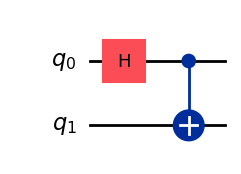

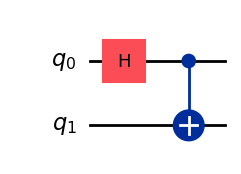

In [3]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [4]:
from qiskit.quantum_info import Pauli

ZZ=Pauli('ZZ')
ZI=Pauli('ZI')
IZ=Pauli('IZ')
XX=Pauli('XX')
XI=Pauli('XI')
IX=Pauli('IX')

observables=[ZZ,ZI,IZ,XX,XI,IX]

In [5]:
from qiskit_aer.primitives import Estimator

In [6]:
estimator=Estimator()
job=estimator.run([qc] * len(observables),observables )
job.result()


EstimatorResult(values=array([ 1.        ,  0.00195312,  0.00195312,  1.        , -0.04296875,
       -0.04296875]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0053761, 'sample_measure_time': 0.0007369, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 7975, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 4, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9999961853027344, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0053761, 'sample_measure_time': 0.000736

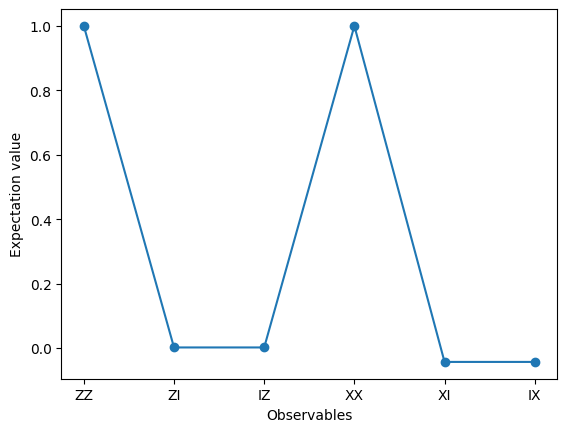

In [7]:
import matplotlib.pyplot as plt

data= [ 'ZZ','ZI','IZ','XX','XI','IX']
values=job.result().values

plt.plot(data,values,'-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

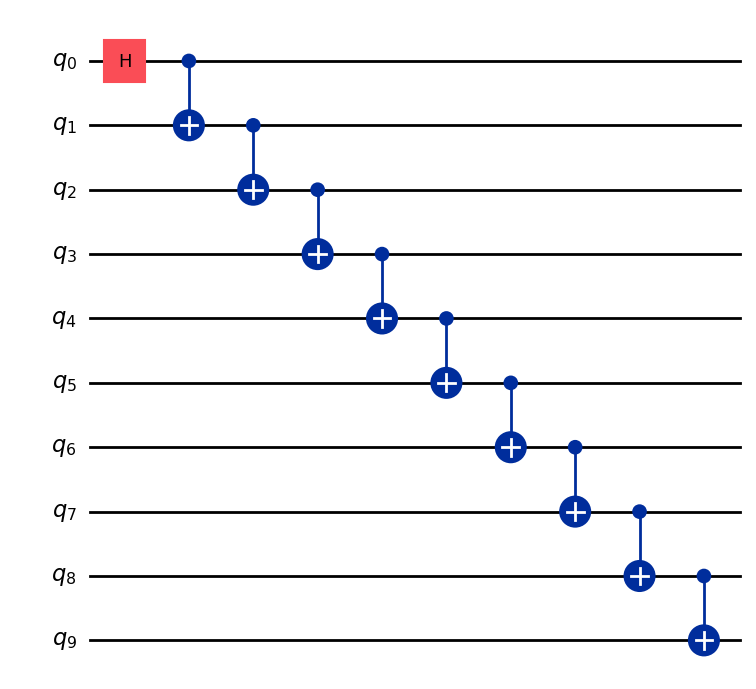

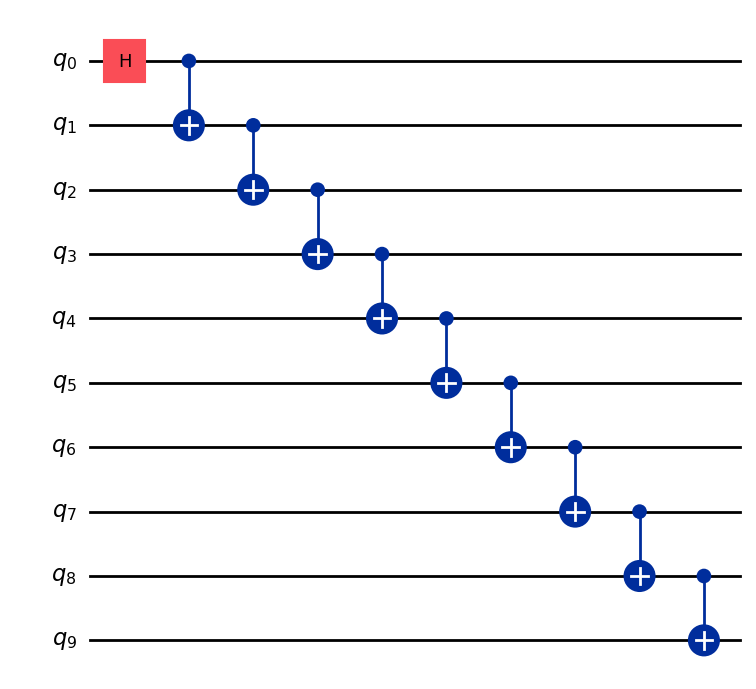

In [8]:
def get_qc_for_n_qubit_GHZ_state(n):
  qc=QuantumCircuit(n)
  qc.h(0)
  for i in range(n-1):
    qc.cx(i,i+1)
  return qc

n=10
qc=get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

In [9]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.circuit.classical import expr

def get_dynamic_CNOT_circuit(num_qubit):

  num_ancilla= num_qubit -2
  num_ancilla_pair =int(num_ancilla/2)

  qr=QuantumRegister(num_qubit)
  cr1=ClassicalRegister(num_ancilla_pair,name="cr1")
  cr2=ClassicalRegister(num_ancilla - num_ancilla_pair,name="cr2")

  cr3=ClassicalRegister(2,name="cr3")

  qc=QuantumCircuit(qr,cr1,cr2,cr3)

  qc.h(0)
  qc.barrier()
  qc.cx(0,1)

  for i in range(num_ancilla_pair):
    qc.h(2+2*i)
    qc.cx(2+2*i , 2+2*i+1)

  for i in range(num_ancilla_pair+1):
   
   qc.cx(1+2*i , 1+2*i+1)

  for i in range(num_ancilla_pair+2):
   
   qc.h(2*i-1)

  for i in range(1,num_ancilla_pair+2):
    qc.measure(2*i-1, cr2[i-1])

    if i ==1:
      parity_control = expr.lift(cr2[i-1])

    else:
      parity_control=expr.bit_xor(cr2[i-1],parity_control)

  for i in range(num_ancilla_pair):
    qc.measure(2*i + 2,cr1[i])
    if i==0:
      parity_target = expr.lift(cr1[i])
    else:
      parity_target = expr.bit_xor(cr1[i],parity_target)

  with qc.if_test(parity_control):
    qc.z(0)

  with qc.if_test(parity_target):
    qc.x(-1)

  return qc

       




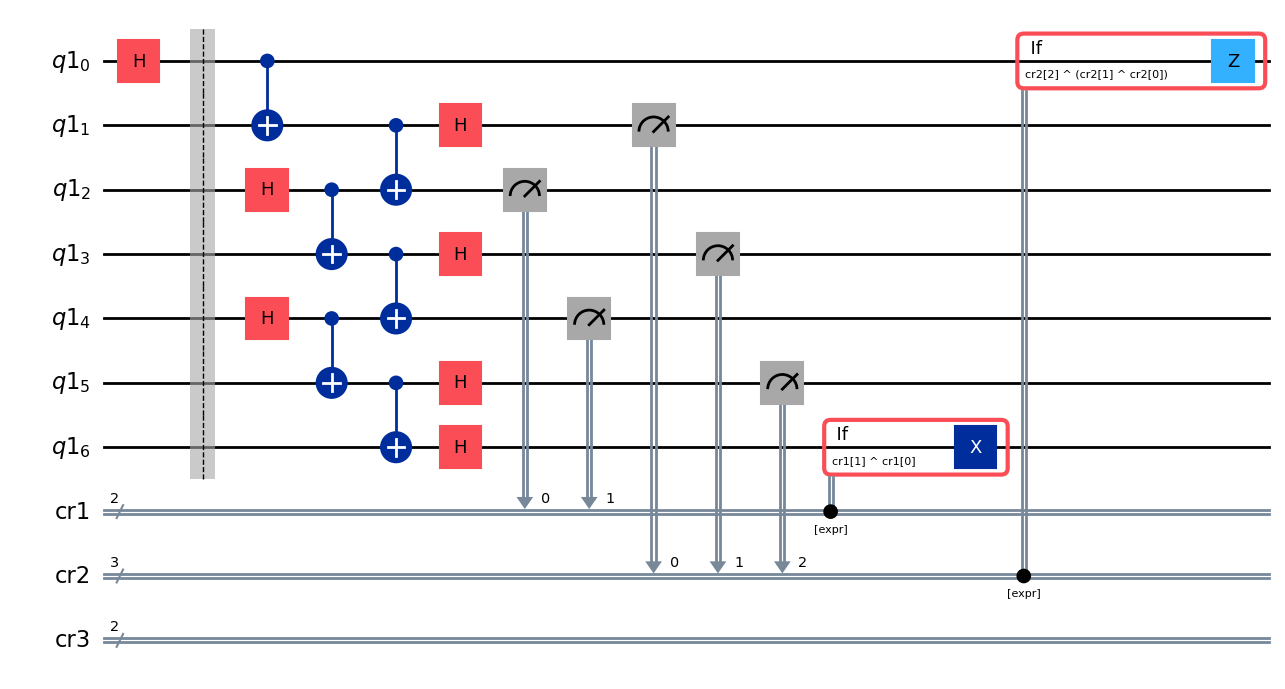

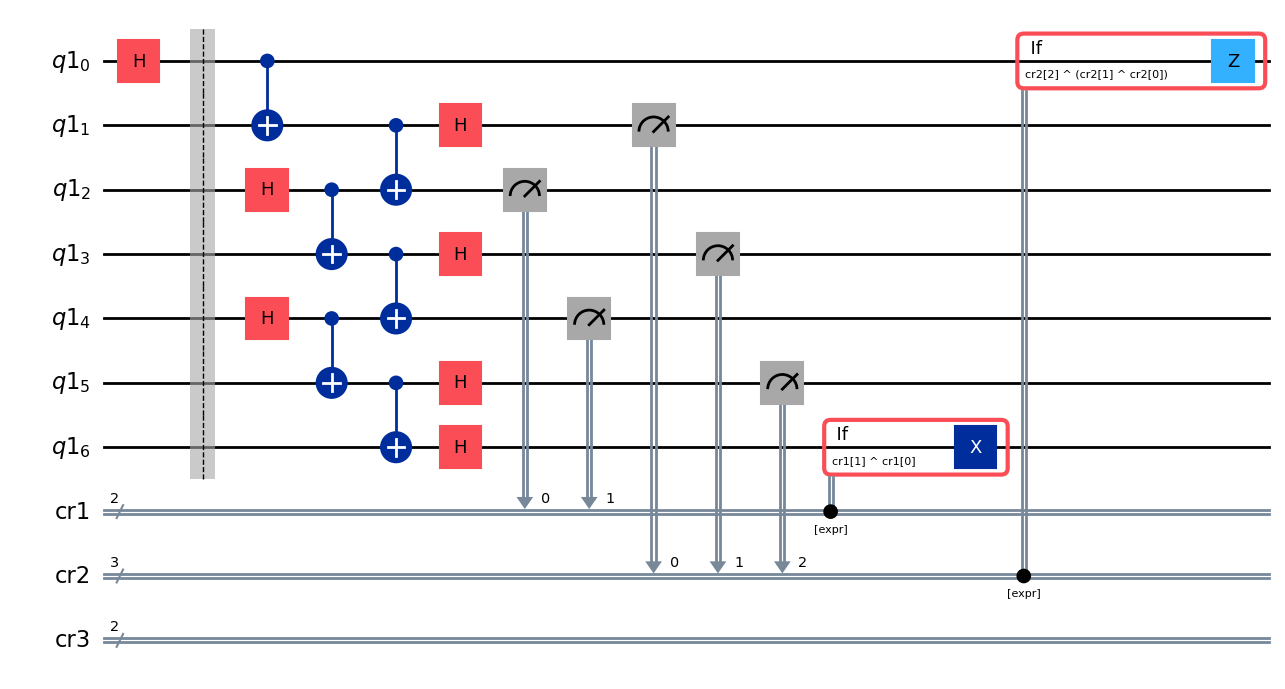

In [10]:
qc= get_dynamic_CNOT_circuit(num_qubit=7)
qc.draw(output='mpl')
